# Part I - Prosper Loan Dataset Exploration
## by Austin Mink

## Contents

1. [Introduction & Preliminary Wrangling](#1.-Introduction-&-Preliminary-Wrangling)
2. [Assessing Data](#2.-Assessing-Data)
    1. [Cleaning](#a.-Cleaning)
    2. [Structure](#b.-Structure)
3. [Exploratory Analysis](#3.-Exploratory-Analysis)
    1. [Univariate](#a.-Univariate)
        1. [Univariate Observations](#i.-Univariate-Observations)
    2. [Bivariate](#b.-Bivariate)
        1. [Bivariate Observations](#i.-Bivariate-Observations)
    3. [Multivariate](#c.-Multivariate)
4. [Conclusions](#4.-Conclusions)

# 1. Introduction & Preliminary Wrangling
> The dataset we will be using in this assignment contains a wide range of financially related details associated with individuals who have applied and been approved for loans in regards to the Prosper banking company.


In [900]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [901]:
#import dataset
df = pd.read_csv('prosperLoanData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

_There are 80 columns in the initial dataset, but for the purposes of this project I am only going to be using 12 of them - instead of dropping the rest I will create a new dataframe and add the data that I am interested in:_

In [902]:
df2 = df[['Term', 'BorrowerAPR', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
    'IsBorrowerHomeowner', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CurrentDelinquencies'
    , 'AmountDelinquent', 'ProsperScore']]

# 2. Assessing Data

In [903]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Term                      113937 non-null  int64  
 1   BorrowerAPR               113912 non-null  float64
 2   Occupation                110349 non-null  object 
 3   EmploymentStatus          111682 non-null  object 
 4   EmploymentStatusDuration  106312 non-null  float64
 5   IsBorrowerHomeowner       113937 non-null  bool   
 6   LoanOriginalAmount        113937 non-null  int64  
 7   StatedMonthlyIncome       113937 non-null  float64
 8   DebtToIncomeRatio         105383 non-null  float64
 9   CurrentDelinquencies      113240 non-null  float64
 10  AmountDelinquent          106315 non-null  float64
 11  ProsperScore              84853 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 9.7+ MB


In [904]:
# There are a lot of missing data counts like ProsperScore, Occupation, and EmploymentStatusDuration
# so we will drop all null values

### a. Cleaning

In [905]:
df_loan = df2.dropna()

In [906]:
# pull new df structure data 
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Term                      76216 non-null  int64  
 1   BorrowerAPR               76216 non-null  float64
 2   Occupation                76216 non-null  object 
 3   EmploymentStatus          76216 non-null  object 
 4   EmploymentStatusDuration  76216 non-null  float64
 5   IsBorrowerHomeowner       76216 non-null  bool   
 6   LoanOriginalAmount        76216 non-null  int64  
 7   StatedMonthlyIncome       76216 non-null  float64
 8   DebtToIncomeRatio         76216 non-null  float64
 9   CurrentDelinquencies      76216 non-null  float64
 10  AmountDelinquent          76216 non-null  float64
 11  ProsperScore              76216 non-null  float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 7.1+ MB


In [907]:
test = df_loan.duplicated()
test.value_counts()

False    76216
dtype: int64

In [908]:
# dataframe has no duplicates

In [909]:
df_loan.head(15)

,Term,BorrowerAPR,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,LoanOriginalAmount,StatedMonthlyIncome,DebtToIncomeRatio,CurrentDelinquencies,AmountDelinquent,ProsperScore
1,36,0.12016,Professional,Employed,44.0,False,10000,6125.000000,0.18,0.0,0.0,7.0
3,36,0.12528,Skilled Labor,Employed,113.0,True,10000,2875.000000,0.15,4.0,10056.0,9.0
4,36,0.24614,Executive,Employed,44.0,True,15000,9583.333333,0.26,0.0,0.0,4.0
5,60,0.15425,Professional,Employed,82.0,True,15000,8333.333333,0.36,0.0,0.0,10.0
6,36,0.31032,Sales - Retail,Employed,172.0,False,3000,2083.333333,0.27,0.0,0.0,2.0
7,36,0.23939,Laborer,Employed,103.0,False,10000,3355.750000,0.24,0.0,0.0,4.0
8,36,0.07620,Food Service,Employed,269.0,True,10000,3333.333333,0.25,0.0,0.0,9.0
9,36,0.07620,Food Service,Employed,269.0,True,10000,3333.333333,0.25,0.0,0.0,11.0
10,60,0.27462,Fireman,Employed,300.0,False,13500,7500.000000,0.12,1.0,253.0,7.0
12,36,0.17969,Sales - Retail,Employed,1.0,False,4000,2416.666667,0.18,0.0,0.0,4.0


## b. Structure

## What is the structure of your dataset?

> This dataset has 76,216 different loan entries with 12 data points _(Term, BorrowerAPR, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, LoanOriginalAmount, StatedMonthlyIncome, DebtToIncomeRatio, CurrentDelinquencies, AmountDelinquent, ProsperScore.)_

### What is/are the main feature(s) of interest in your dataset?

> I'm mostly interested in figuring out how attributes are calculated to determine who gets approved for a loan and who doesn't. I believe this is directly correlated to the ProsperScore each applicant is given, and I want to see which attributes have more of an impact on the ProsperScore.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the variables that will have the most direct impact on ProsperScore and APR would be a mix of StatedMonthlyIncome and EmploymentStatus or EmploymentStatusDuration.

# 3. Exploratory Analysis

## a. Univariate

In [910]:
df_loan.sort_values('ProsperScore', ascending=True)

,Term,BorrowerAPR,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,LoanOriginalAmount,StatedMonthlyIncome,DebtToIncomeRatio,CurrentDelinquencies,AmountDelinquent,ProsperScore
79177,36,0.27776,Construction,Employed,95.0,True,3600,11666.666667,0.11,2.0,0.0,1.0
100217,36,0.35244,Police Officer/Correction Officer,Employed,212.0,False,3500,2778.333333,0.37,1.0,583.0,1.0
4231,60,0.35838,Professional,Employed,277.0,True,4000,4723.333333,0.31,0.0,0.0,1.0
12230,36,0.34621,Professional,Full-time,186.0,True,5000,8333.333333,0.28,3.0,7471.0,1.0
4226,36,0.34621,Professional,Employed,119.0,True,7500,6666.666667,0.36,5.0,3428.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27178,36,0.13189,Police Officer/Correction Officer,Employed,101.0,True,14000,10000.000000,0.14,1.0,138.0,11.0
84219,36,0.09030,Engineer - Electrical,Employed,297.0,True,20000,5675.000000,0.24,0.0,0.0,11.0
60284,60,0.15425,Professional,Employed,127.0,True,25000,13750.000000,0.11,0.0,0.0,11.0
33303,36,0.09000,Teacher,Employed,209.0,True,3000,7250.000000,0.11,0.0,0.0,11.0


- Lowest ProsperScore is 1 and highest is 11.0

<AxesSubplot:>

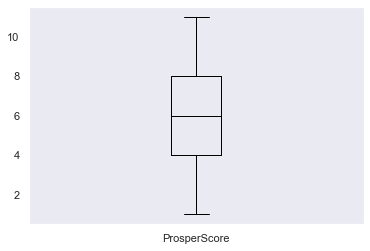

In [911]:
# I would like to get a general idea of the central ranges of ProsperScore amongst the dataset 
df_loan.boxplot(column=['ProsperScore'], grid=False, color='black')

- The median Prosper Score of the 76,216 applicants is slightly above 6.0 - however, this does not mean that this is the actual average score although considering the amount of applicants it may be fairly close to that when looking at the symmetry of the 1st and 3rd quartile ranges.

Text(0.5, 1.0, 'Prosper Loans')

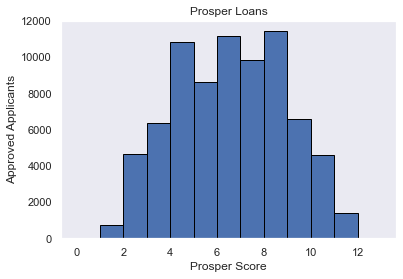

In [912]:
df_loan.hist(column='ProsperScore', grid=False, edgecolor='black', bins=[0, 1, 2, 3, 4, 5, 6, 7,
                                                                             8, 9, 10, 11, 12, 13])
plt.xlabel('Prosper Score')
plt.ylabel('Approved Applicants')
plt.title('Prosper Loans')

- The distribution of Prosper Scores across the dataset is bimodal, where the score peaks twice; once at  a score of 6, then again at 8. Considering there are still individuals with a higher Prosper Score than 8 - this may indicate that either the higher the Prosper Score does not independently qualify an applicant for a loan, or that people who would be likely to have a Prosper Score of higher than 8 are less likely to apply for a loan in the first place. I am leaning towards the latter theory. _(although with this dataset it would be impossible to prove as we do not have access to data of applicants who were denied a loan)_

In [913]:
# I believe some of the biggest factors that determine the Prosper Score are the original loan amounts, debt to 
# income ratios, and borrower APR

Text(0.5, 1.0, 'Prosper Loans')

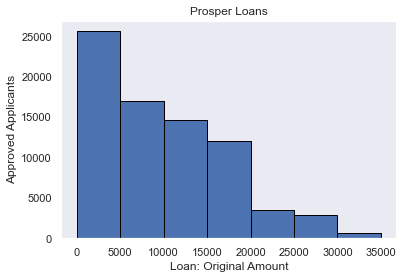

In [914]:
df_loan.hist(column='LoanOriginalAmount', grid=False, edgecolor='black', bins=[0, 5000, 10000, 15000, 20000
                                                                               , 25000, 30000, 35000])
plt.xlabel('Loan: Original Amount')
plt.ylabel('Approved Applicants')
plt.title('Prosper Loans')

- This right-skewed histogram does indicate that the lower the original loan amount, the higher the chances of an individual getting approved. (5,000 and under being the best chance of approval)

Text(0.5, 1.0, 'Prosper Loans')

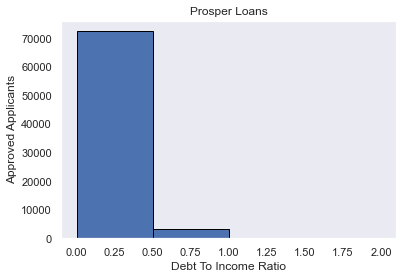

In [915]:
df_loan.hist(column='DebtToIncomeRatio', grid=False, edgecolor='black', bins=[0, 0.5, 1, 1.5, 2])
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Approved Applicants')
plt.title('Prosper Loans')

- The majority of the dataset has a Debt To Income Ratio under 0.5 - which indicates that the chances of approval begin to lower as the ratio of debt catches up to their income.

Text(0.5, 1.0, 'Prosper Loans')

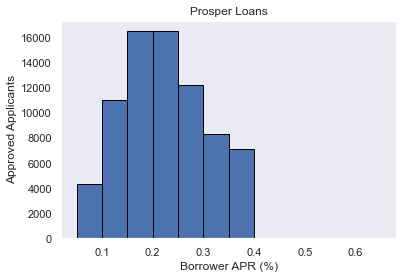

In [916]:
df_loan.hist(column='BorrowerAPR', grid=False, edgecolor='black', bins=[.05, .1, .15, .2, .25, .3, .35, .4, .45
                                                                       , .5, .55, .6, .65])
plt.xlabel('Borrower APR (%)')
plt.ylabel('Approved Applicants')
plt.title('Prosper Loans')

- The borrower APR histogram displays a unimodal distribution peaking between 0.15 and 0.2 (15-20%) - which likely indicates that the approved individuals with an APR in this range have the highest chances of being approved, not accounting for other variables. At the same time the range between 0.1-0.3 altogether have relatively similar amounts of approved applicants above 3,000 - so this range is also worth looking into to identify patterns amongst other variables to identify the most important attributes that lead to an applicant's approval.

Text(0.5, 1.0, 'Prosper Loans')

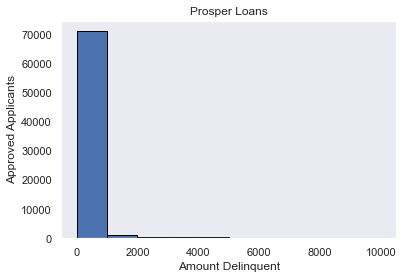

In [917]:
df_loan.hist(column='AmountDelinquent', grid=False, edgecolor='black', bins = [0, 1000, 2000, 3000, 4000, 5000, 6000,
                                                                              7000, 8000, 9000, 10000])
plt.xlabel('Amount Delinquent')
plt.ylabel('Approved Applicants')
plt.title('Prosper Loans')

- The majority of the individuals(70,000) have no delinquent amounts/no delinquencies - but if remove the individuals who have no delinquency amounts from the graph, we may get a better view at the distribution of delinquency data amongst those who do have delinquencies that were still approved. 

Text(0.5, 1.0, 'Prosper Loans')

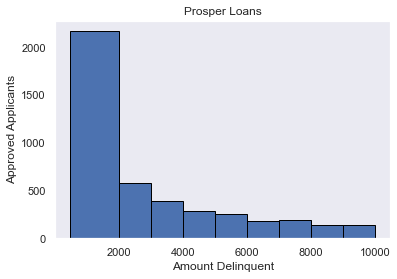

In [918]:
df_loan.hist(column='AmountDelinquent', grid=False, edgecolor='black', bins = [500, 2000, 3000, 4000, 5000, 6000,
                                                                              7000, 8000, 9000, 10000])
plt.xlabel('Amount Delinquent')
plt.ylabel('Approved Applicants')
plt.title('Prosper Loans')

- It is very clear that there are a lot less individuals who were approved who had an amount delinquent of over 2,000

Text(0.5, 1.0, 'Prosper Loans')

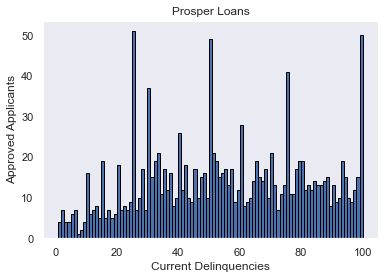

In [919]:
bins = pd.Series(range(1,101))
df_loan.hist(column='AmountDelinquent', grid=False, edgecolor='black', bins=bins)
plt.xlabel('Current Delinquencies')
plt.ylabel('Approved Applicants')
plt.title('Prosper Loans')

- It appears that there are quite a lot of applicants with a large amount of delinquencies (in no consistently observable fashion) that were still eligible for a loan - so I would not categorize current delinquencies as deciding factor that effects eligiblity.

In [920]:
# Outside of direct financial attributes, I believe employment status and duration are going to be major
# indicators of an increased chance of being eligible for a loan.

Text(0.5, 1.0, 'Prosper Loans')

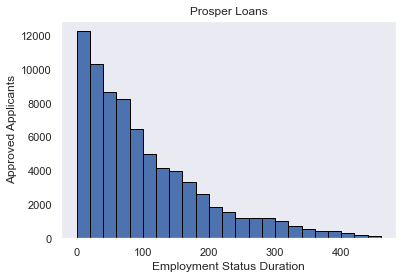

In [921]:
df_loan.hist(column='EmploymentStatusDuration', grid=False, edgecolor='black', bins=[0, 20, 40, 60, 80, 100, 120,
                                                                                     140, 160, 180, 200, 220, 240,
                                                                                     260, 280, 300, 320, 340, 360,
                                                                                    380, 400, 420, 440, 460])
plt.ylabel('Approved Applicants')
plt.xlabel('Employment Status Duration')

plt.title('Prosper Loans')

- Interestingly, people who have a significantly shorter duration of employment status make up a larger portion of the dataset. This may be due to many factors, such as lack of necessity of acquiring loans in the general population of people who have a reliable work history - or possibly that the banking company offers better loan agreements to newly hired employees as those individuals may be more likely to repeat the loan cycle over time. It could even be a combination of the two. 

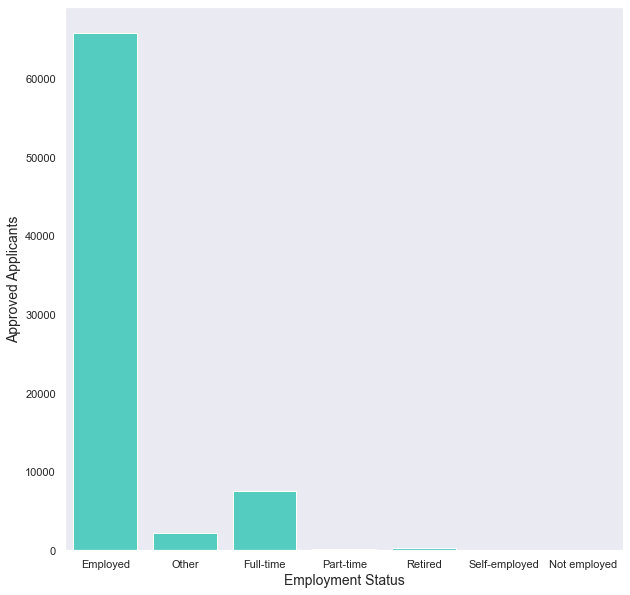

In [922]:
fig, ax = plt.subplots(nrows=1, figsize = [10,10])

default_color = sb.color_palette()[0]
count = sb.countplot(data = df_loan, x = 'EmploymentStatus', color = 'turquoise')
count.set_xlabel("Employment Status", fontsize = 14)
count.set_ylabel("Approved Applicants", fontsize = 14)
plt.show()

- In looking at these categories, it appears that the majority of this dataset is not as precise as it could be considering that over 60,000 approved applicants are only categorized as Employed rather than 'full-time' or 'part-time'. However, I don't think it would be wise to remove these individuals from the dataset as a general "Employed" status may prove to be more than enough to qualify for a low APR loan in comparison to other factors once we get to the bivariate and multivariate sections. If that is the case, then this could reveal a major flaw in the companies process of determining loan eligibility. 

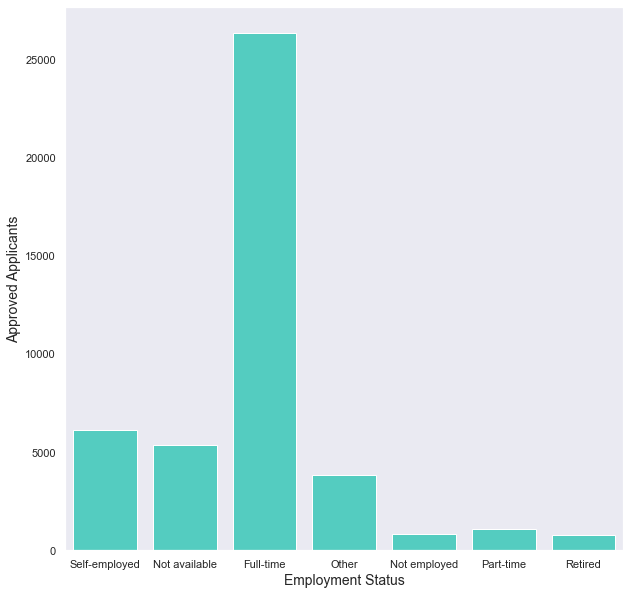

In [923]:
fig, ax = plt.subplots(nrows=1, figsize = [10,10])
df_loan2 = df.copy()
df_loan2 = df_loan2[df_loan2['EmploymentStatus'] != 'Employed']

default_color = sb.color_palette()[0]
count = sb.countplot(data = df_loan2, x = 'EmploymentStatus', color = 'turquoise')
count.set_xlabel("Employment Status", fontsize = 14)
count.set_ylabel("Approved Applicants", fontsize = 14)
plt.show()

- Unsuprisingly, a majority of the approved applicants are Employed. Considering the large amount of employed individuals in the dataset make it appear as though the self-employed segment is non-existent, self-employed individuals still make up a decent amount of the dataset in comparison to categories not including 'Employed'.

## i. Univariate Observations

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> One unusual distribution of data was the employment status duration. I did not expect that the higher the employment duration, the less frequently people would be approved. However, I believe the most logical reason for this is that people who have shorter employment history are more likely to apply for loans in the first place as they are more likely to be in the process of finding financial stability earlier in their career or in the midst of any career changes - thus the longer people are employed the less likely they will be to need to apply for a loan. This makes me wonder if the company is also targetting newly hired employees in their marketing efforts, or if there is any relation to employment status duration and the Borrower APR they receive - it would make sense that they would offer someone in their early stages of employment a lower APR in order to get as many recently employed people to acquire a loan. 

> I believe in the bivariate stage, based on this information, there may actually be a higher APR for people who have a longer employment history with higher income. I say this because if someone has a longer history of employment, if they were in a position to seek out a loan, this could indicate that they are currently in financial trouble and in this case their long employment history could actually indicate more of a risk factor in combination with other variables. This is not something I had considered before looking at the histogram.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Other than the above mentioned, there were no other unusual distributions that I noticed from the univariate analysis - nor did I identify any data to tidy, adjust or change. This is mostly because I already cleaned and tidied up the dataset in the initial reading of the data into the project. If I were looking specifically into what attributes help people with bad credit history/delinquencies - I would have removed all individuals with zero delinquency data. However, in this case I am interested in seeing generally what attributes consistently lead to elgibilty regardless of credit history.


## b. Bivariate

In [924]:
# Considering that a newly employed individual may be making significant life changes like buying a home - I want
# to see if there is any correllation between the newly employed and their homeowner status

df_loan.shape= (76216, 12)
df_loan_samp.shape= (1000, 14)


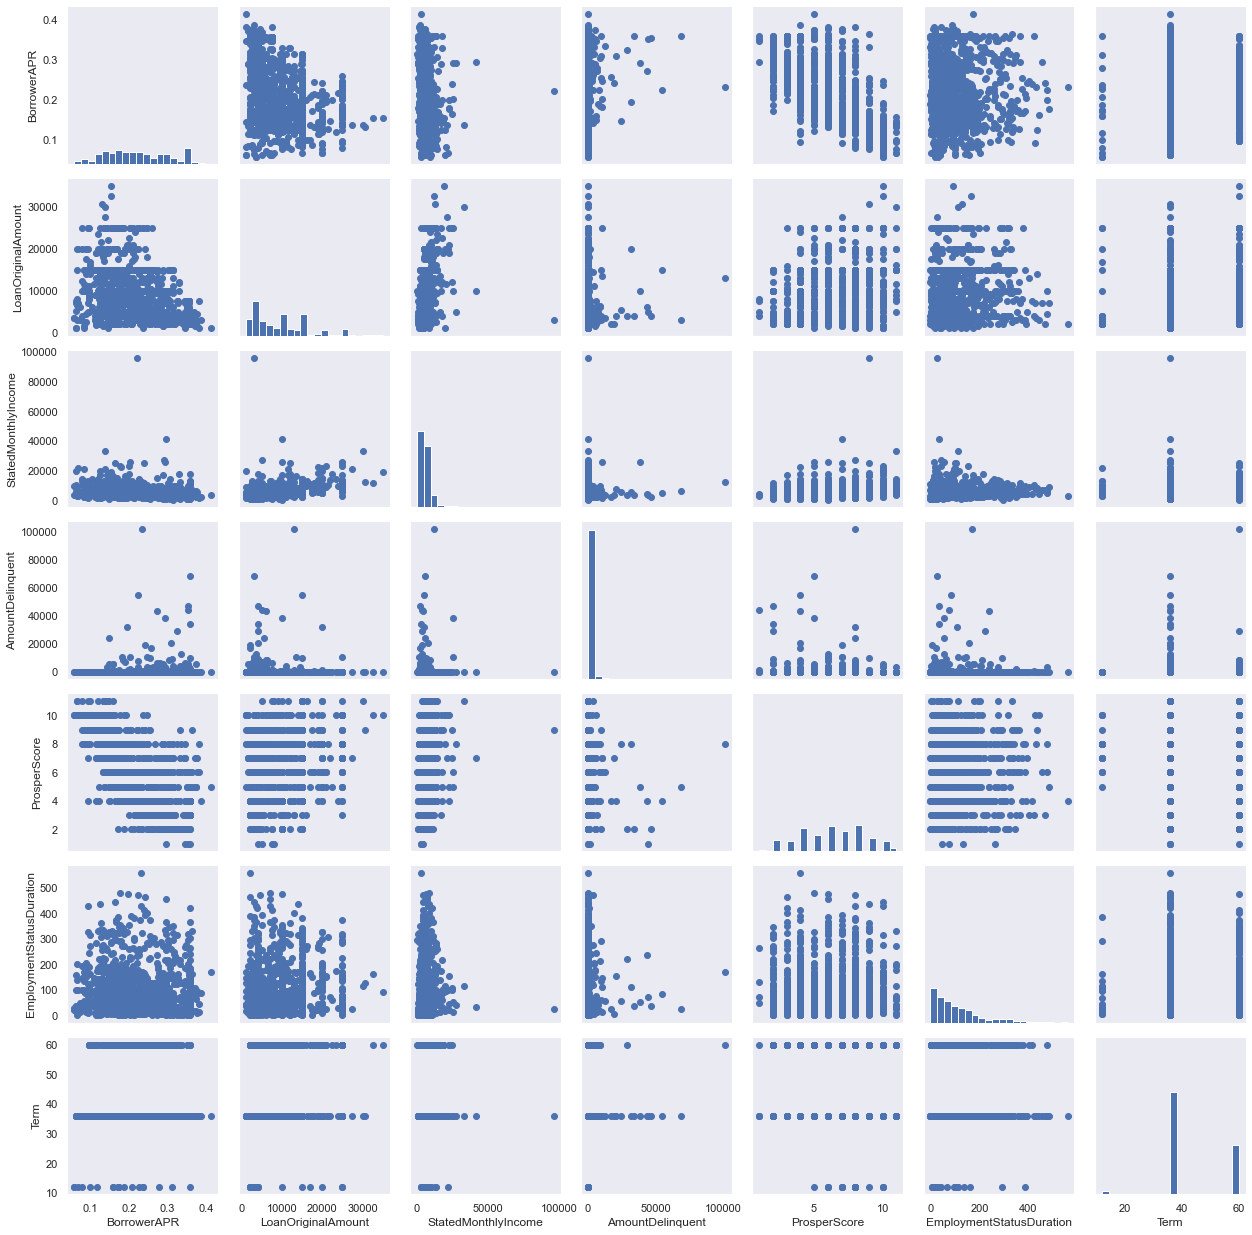

In [925]:
numerical = ['BorrowerAPR', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'AmountDelinquent', 'ProsperScore', 
                'EmploymentStatusDuration', 'Term']
categorical = ['IsBorrowerHomeowner', 'EmploymentStatus']

occupation = ['Occupation']

print("df_loan.shape=",df_loan.shape)
df_loan_segment = df_loan.sample(n=1000, replace = False)
print("df_loan_samp.shape=",df_loan_samp.shape)

g = sb.PairGrid(data = df_loan_segment, vars = numerical)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

- The first thing I noticed in this graph is that the Prosper Score appears to have a direct connection to the Borrower APR - where the lower the score is the higher the APR in general with a much shorter range.
- I also see a relatively right-skewed graph between the APR and the original loan amount. This may indicate that the company gives more incentives to acquire a larger loan to eligible individuals by reducing the APR. 
- The prosper score has a direct left-skewed distribution in relation to the original loan amount - where the higher the score, the higher the original loan amount is acquired.
- It is also apparent that the shorted the employment status duration is, people are more restricted to a shorter term loan. This may be to reduce risk on behalf of the company in the case that their employment duration is short-lived, but also to keep people coming back to get more loans.

In [926]:
# Exploring further relationships between BorrowerAPR and Prosper Score - starting with our only categorical data
# available in this segment of data: homeowner and employment status.

<Figure size 720x720 with 0 Axes>

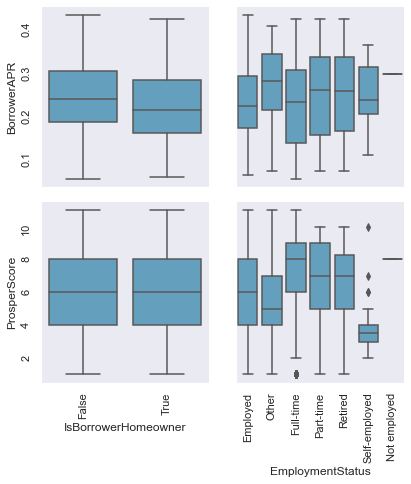

In [927]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette('icefire')[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'ProsperScore'], x_vars = categorical,
                height = 3, aspect = 1)
for ax in g.axes.flatten():
    ax.tick_params(rotation = 90)
g.map(boxgrid)
plt.show();

- Homeowner status does not appear to have a direct increase on prosper score, but homeowner's do appear to receive a lower APR in general.
- Employment status appears to have more weight in determining a higher Prosper Score in comparison.
- In seeing the relationship in categories like Part-time employment status that have a Prosper Score of around 8, I notice that the APR is roughly the same as other categories that have a lower Prosper score. This may indicate that the Prosper Score itself does not have a direct impact alone on calculating the APR. 

In [928]:
# I would like to see a bird's eye view of the distribution of
# Borrower APR, Prosper Score, and Stated Monthly Income across the large list of occupations.

<Figure size 1584x1584 with 0 Axes>

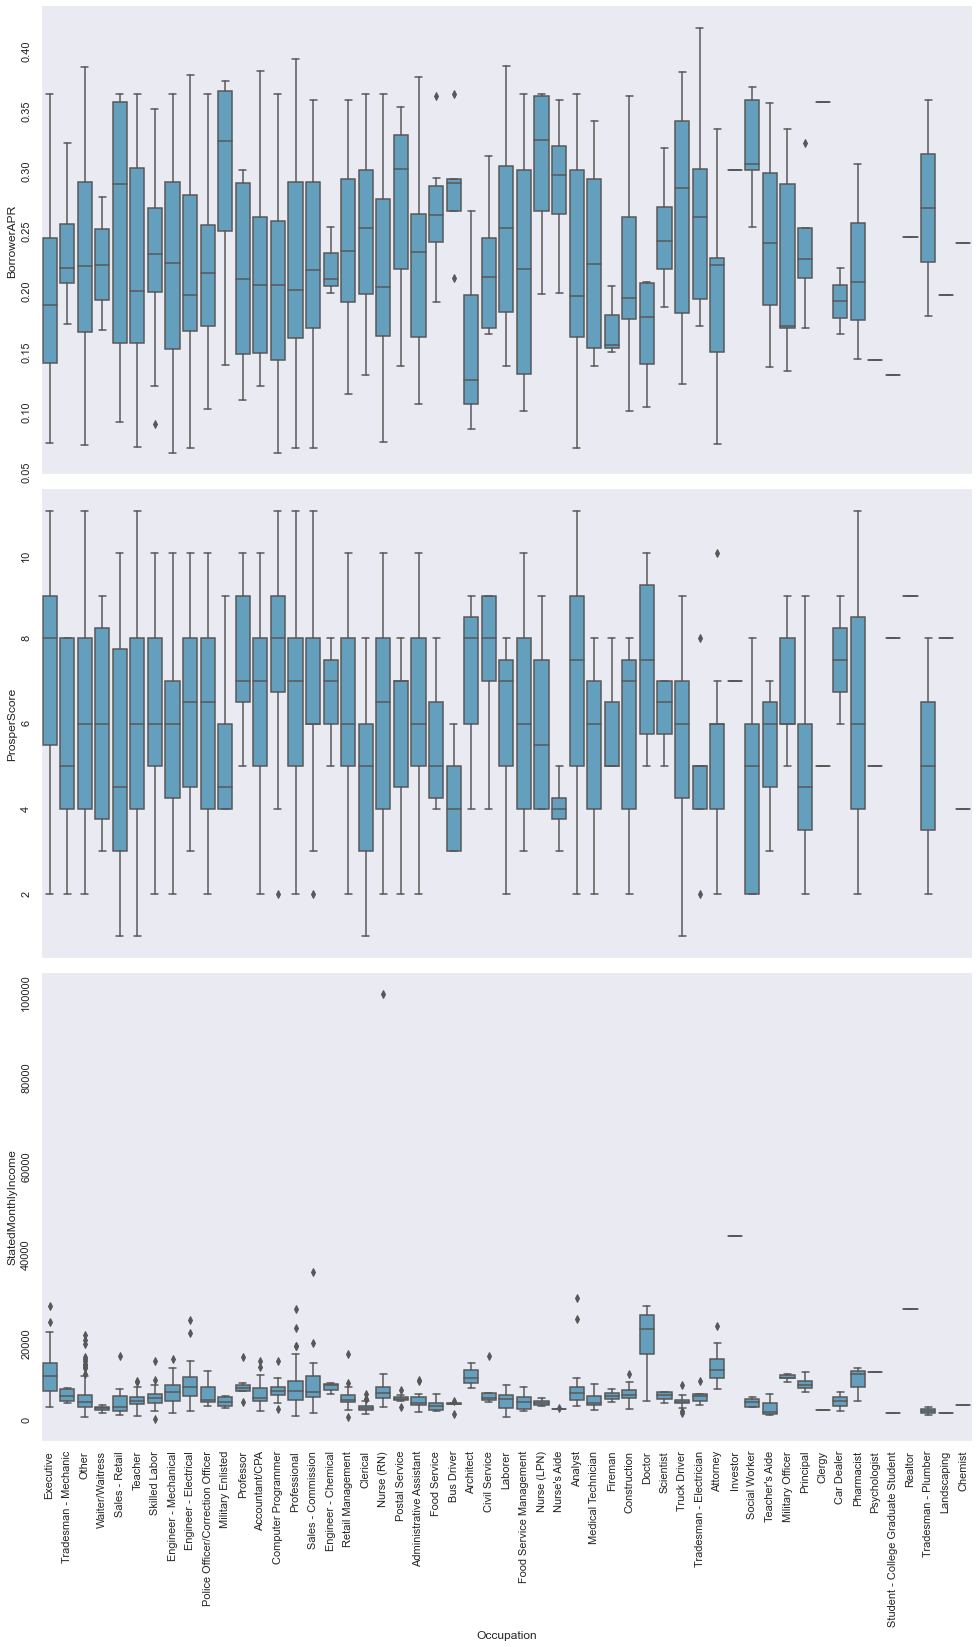

In [929]:
plt.figure(figsize = [22, 22])
sb.set={'figure.figsize':(12,8)}
g = sb.PairGrid(data = df_loan_segment, y_vars = ['BorrowerAPR', 'ProsperScore',
                                              'StatedMonthlyIncome'], x_vars = occupation,
                height = 7, aspect = 2)
for ax in g.axes.flatten():
    ax.tick_params(rotation = 90)
    
g.map(boxgrid)
plt.show();

In [930]:
# Although it is a crowded display, in this format it is very clear some fields have very significant advantages
# in terms of the ability to acquire loans of a higher amount with lower APR

- If you look at categories like Attorney, Doctor, Pilots, and Military Officers - there is a clearly higher Prosper Score as well as a lower APR. However, if you look at occupations like Clergy, they don't necessarily have a high stated monthly income in comparison to others - yet they still manage to receive a high Prosper Score and a lower APR. This may indicate that the company utilizes some type of weighted formula for reviewing an applicant's occupation when considering a loan offer.

## i. Bivariate Observations

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Going into this analysis, I thought the homeowner status would have a bigger impact than it did. There is a correllation it seems to a lower APR but it did not seem to have much of a change on the Prosper Score.


- When looking at the connection between Prosper Score and APR in the first [pairgrid](#b.-Bivariate) - I noticed a connection between lower APR and higher Prosper Score - but in the Employment status comparisons - I noticed that the APR didn't seem to change much based on Prosper Scores alone as some lower Prosper Score comparisons had lower or the same APR. I also noticed that the Not Employed column is suspiciously high on the Prosper Score. This leads me to believe that the Prosper Score is not weighted equally by employment status but by a combination of other factors. It appears that even though the APR is influenced by the Prosper Score across the entire dataset outside of employment status, APR may be calculated or weighted differently in comparison to other factors when comparing ambiguous categories like Employed, Other, Self-Employed - as compared to categories with more clarity such as full time or part time. One observation that reinforces this idea is that the full time and part time categories are the only categories in employment status that fit the following argument: _high prosper score = lower apr / low prosper score = higher apr_

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Another unexpected observation was an apparent connection between shorter term loans and individuals with short employment durations. That is not something I would have thought to be obvious, but this consistent decision likely benefits the company in multiple ways by reducing risk of individuals not being able to pay back loans in any case that their employment status were to change, as well as a more likely increase in repeat loans as the same individuals with shorter terms are also more limited in the amount of their original loans. Seeing as the shorter term loans have an even distribution of the borrower APR, many individuals are likely incentivized to borrower larger amounts in the future if they maintain payments.


## c. Multivariate


In [931]:
# For starters, I want to see a general correlation plot between all the numerical variables in the dataset 
# which will be easiest to see in a heatmap

<AxesSubplot:>

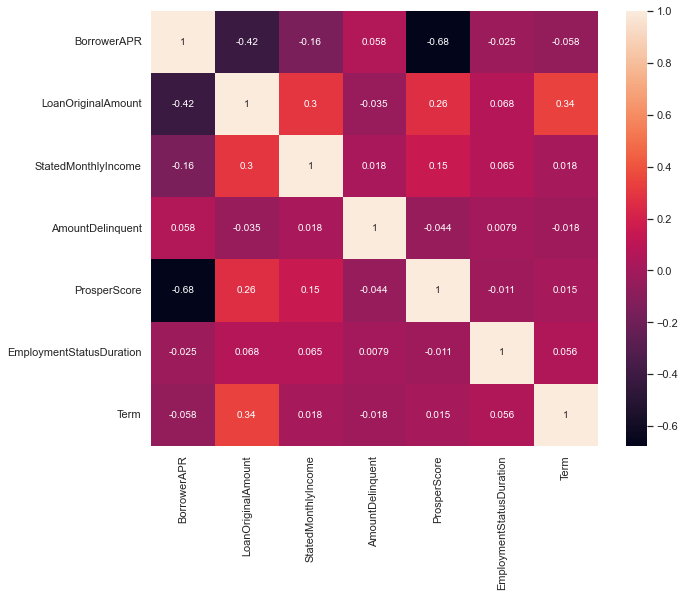

In [932]:
plt.figure(figsize = [10, 8])
sb.heatmap(df_loan.loc[:, ['BorrowerAPR', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'AmountDelinquent', 
                    'ProsperScore', 'EmploymentStatusDuration', 'Term']].corr(), annot=True)

 - debunking my previous theory, the prosper score appears to have a negative correlation to the borrower APR
 - the loan amount also has a negative correlation to the borrower APR
 - The loan amounts are strongly related to the term and the prosper score even though the APR has virtually no correlation - and the propser score is correlated to the loan amount more than any other variable aside from employment status which is not listed in the above heatmap

In [933]:
# I want to plot several more heatmaps that show in depth details about various employment status comparisons to 
# other factors including the average APR, income, loan amounts, and employment status durations. This will give
# a clearer picture of how different employment statuses may be compared to the prosper score. I am
# choosing these variables to compare based on the correlation plot above.

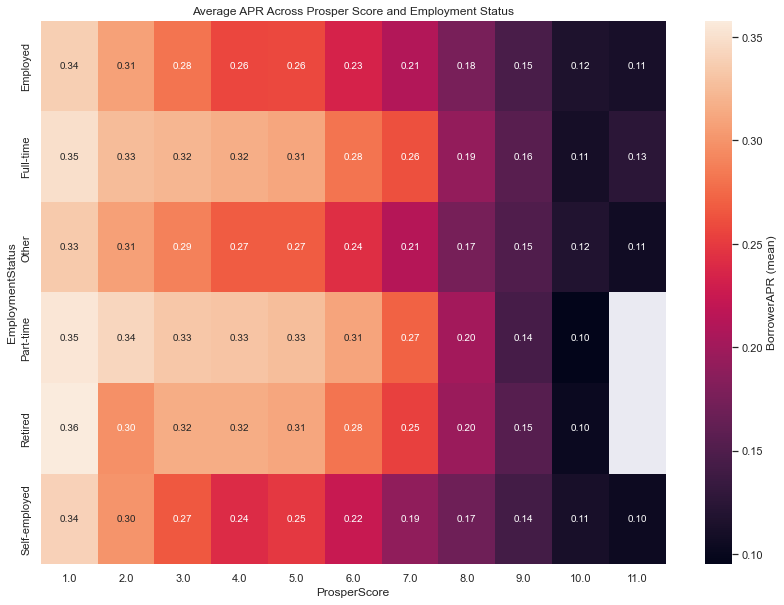

In [934]:
plt.figure(figsize = [14, 10])
# redefining the df_loan2 variable created in the univariate exploration section but with similar function
df_loan2 = df.copy()
df_loan2 = df_loan2[df_loan2['EmploymentStatus'] != 'Not employed']
avg_score_empl = df_loan2.groupby(['EmploymentStatus', 'ProsperScore']).mean()['BorrowerAPR']
avg_score_empl = avg_score_empl.reset_index(name = 'BorrowerAPR')

avg_score_empl = avg_score_empl.pivot(index = 'EmploymentStatus', columns = 'ProsperScore',
                            values = 'BorrowerAPR')
sb.heatmap(avg_score_empl, annot = True, fmt = '.2f', 
           cbar_kws = {'label' : 'BorrowerAPR (mean)'});
plt.title('Average APR Across Prosper Score and Employment Status');

- Very consistent decrease in APR progressing through an increasing prosper score across each employment status.

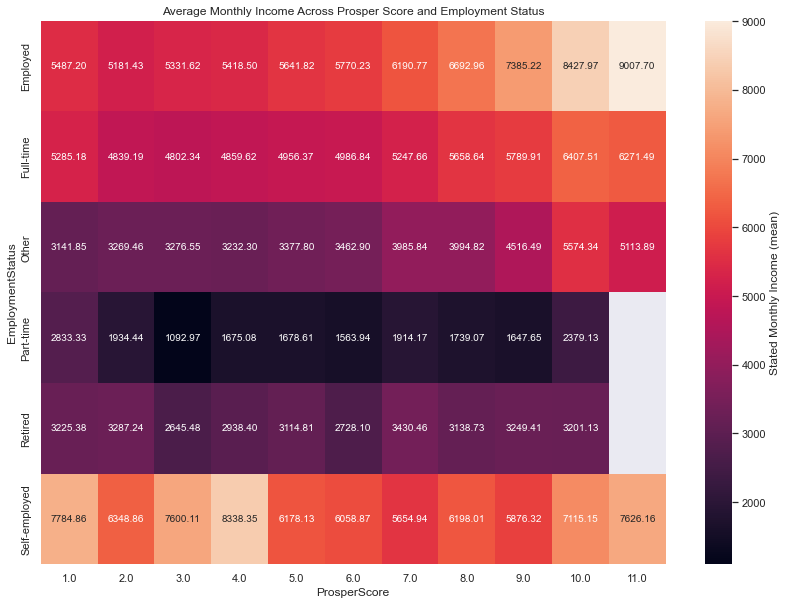

In [935]:
plt.figure(figsize = [14, 10])
df_loanamt = df.copy()
df_loanamt = df_loanamt[df_loanamt['EmploymentStatus'] != 'Not employed']
avg_score_empl = df_loanamt.groupby(['EmploymentStatus', 'ProsperScore']).mean()['StatedMonthlyIncome']
avg_score_empl = avg_score_empl.reset_index(name = 'StatedMonthlyIncome')

avg_score_empl = avg_score_empl.pivot(index = 'EmploymentStatus', columns = 'ProsperScore',
                            values = 'StatedMonthlyIncome')
sb.heatmap(avg_score_empl, annot = True, fmt = '.2f', 
           cbar_kws = {'label' : 'Stated Monthly Income (mean)'});
plt.title('Average Monthly Income Across Prosper Score and Employment Status');

- Monthly income across prosper score and employment status appears to be more of a wildcard/no clear direction of income change across prosper scores

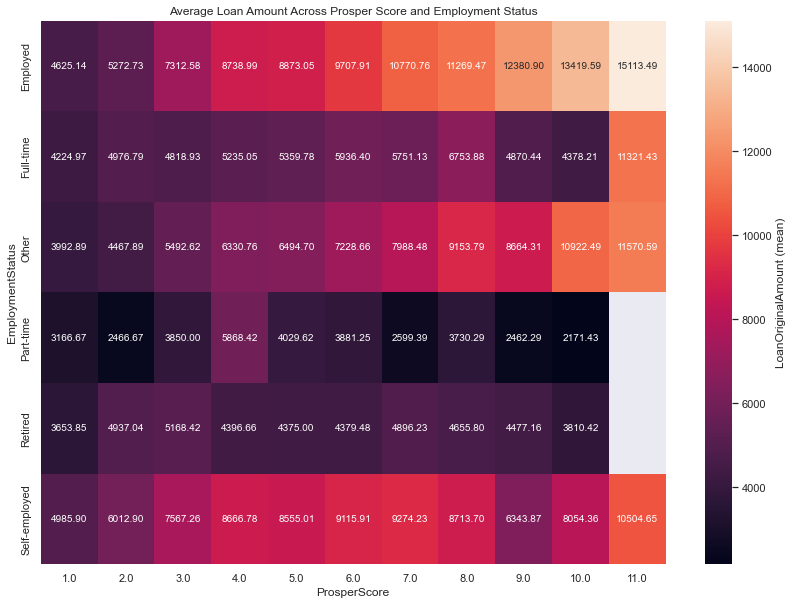

In [936]:
plt.figure(figsize = [14, 10])
df_loanamt = df.copy()
df_loanamt = df_loanamt[df_loanamt['EmploymentStatus'] != 'Not employed']
avg_score_empl = df_loanamt.groupby(['EmploymentStatus', 'ProsperScore']).mean()['LoanOriginalAmount']
avg_score_empl = avg_score_empl.reset_index(name = 'LoanOriginalAmount')

avg_score_empl = avg_score_empl.pivot(index = 'EmploymentStatus', columns = 'ProsperScore',
                            values = 'LoanOriginalAmount')
sb.heatmap(avg_score_empl, annot = True, fmt = '.2f', 
           cbar_kws = {'label' : 'LoanOriginalAmount (mean)'});
plt.title('Average Loan Amount Across Prosper Score and Employment Status');


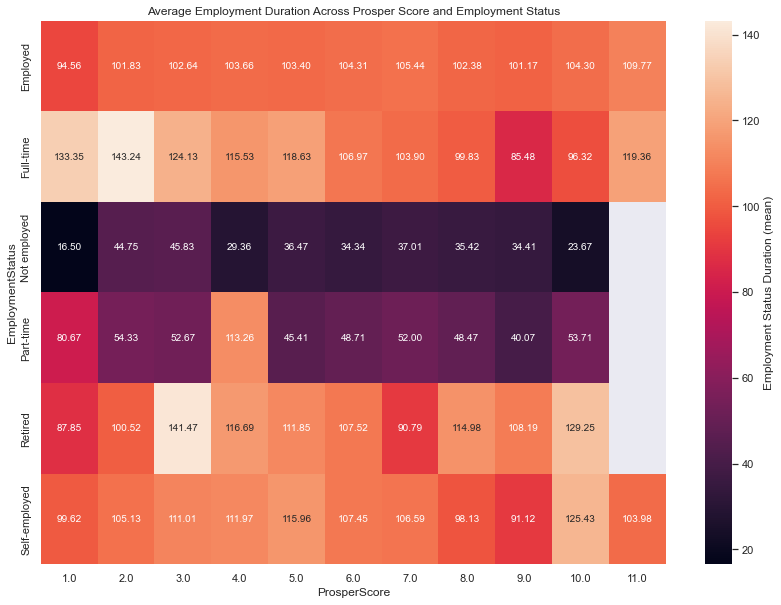

In [937]:
plt.figure(figsize = [14, 10])
df_loanamt = df.copy()
df_loanamt = df_loanamt[df_loanamt['EmploymentStatus'] != 'Other']
avg_score_empl = df_loanamt.groupby(['EmploymentStatus', 'ProsperScore']).mean()['EmploymentStatusDuration']
avg_score_empl = avg_score_empl.reset_index(name = 'EmploymentStatusDuration')

avg_score_empl = avg_score_empl.pivot(index = 'EmploymentStatus', columns = 'ProsperScore',
                            values = 'EmploymentStatusDuration')
sb.heatmap(avg_score_empl, annot = True, fmt = '.2f', 
           cbar_kws = {'label' : 'Employment Status Duration (mean)'});
plt.title('Average Employment Duration Across Prosper Score and Employment Status');


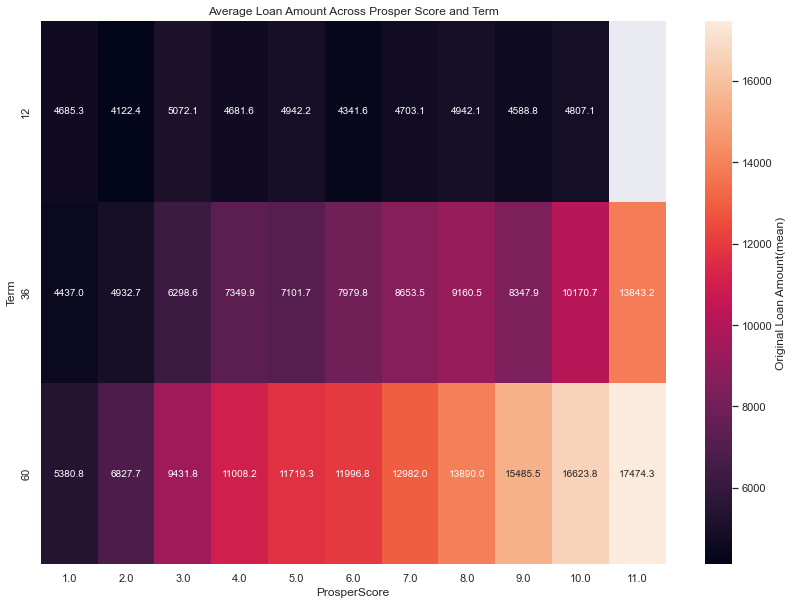

In [938]:
plt.figure(figsize = [14, 10])
df_loanamt = df.copy()
avg_score_empl = df_loanamt.groupby(['Term', 'ProsperScore']).mean()['LoanOriginalAmount']
avg_score_empl = avg_score_empl.reset_index(name = 'LoanOriginalAmount')

avg_score_empl = avg_score_empl.pivot(index = 'Term', columns = 'ProsperScore',
                            values = 'LoanOriginalAmount')
sb.heatmap(avg_score_empl, annot = True, fmt = '.1f', 
           cbar_kws = {'label' : 'Original Loan Amount(mean)'});
plt.title('Average Loan Amount Across Prosper Score and Term');


- This heatmap further confirms the correlation between the loan amount, term and prosper score as this is one of the most consistently progressing set of variables. 

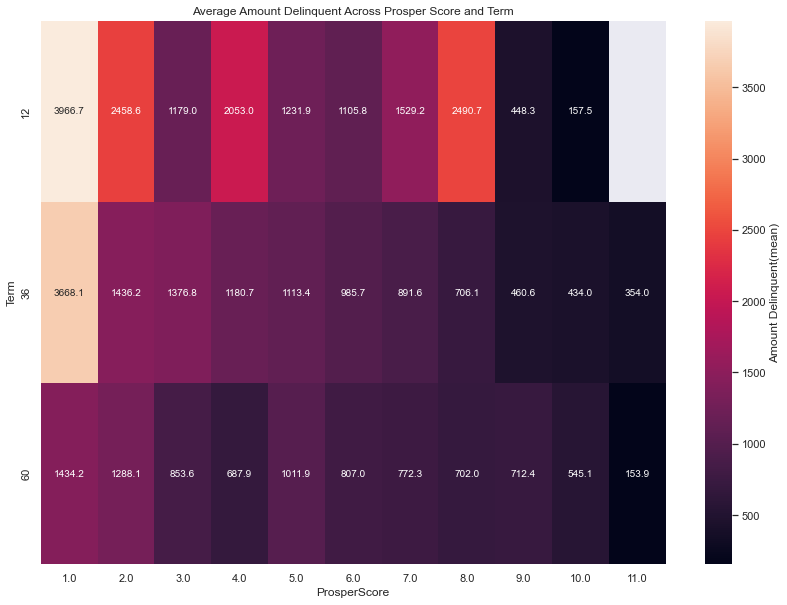

In [939]:
plt.figure(figsize = [14, 10])
df_loanamt = df.copy()
avg_score_empl = df_loanamt.groupby(['Term', 'ProsperScore']).mean()['AmountDelinquent']
avg_score_empl = avg_score_empl.reset_index(name = 'AmountDelinquent')

avg_score_empl = avg_score_empl.pivot(index = 'Term', columns = 'ProsperScore',
                            values = 'AmountDelinquent')
sb.heatmap(avg_score_empl, annot = True, fmt = '.1f', 
           cbar_kws = {'label' : 'Amount Delinquent(mean)'});
plt.title('Average Amount Delinquent Across Prosper Score and Term');


- The lower the amount delinquent across the terms appears to have a noticeable correlation of resulting in a higher prosper score.

In [940]:
# Now I want to segment the dataset to see commonalities amongst variables that fall into a certain APR range

In [941]:
# create first segment of loans under .1 APR 
df_loan_seg = (df_loan['BorrowerAPR'] <= .1)
df_loan_rng = df_loan.loc[df_loan_seg]

Text(0, 0.5, 'Monthly Income ($)')

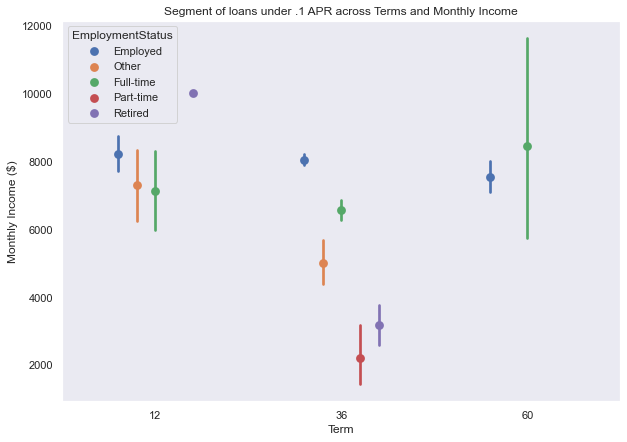

In [942]:
fig, ax = plt.subplots(ncols = 1, figsize = [10,7])

sb.pointplot(data = df_loan_rng, x = 'Term', y = 'StatedMonthlyIncome',
             hue = 'EmploymentStatus', dodge = 0.4, linestyles = '')
ax.set_title('Segment of loans under .1 APR across Terms and Monthly Income')
ax.set_xlabel('Term')
ax.set_ylabel('Monthly Income ($)')

Text(0, 0.5, 'Monthly Income ($)')

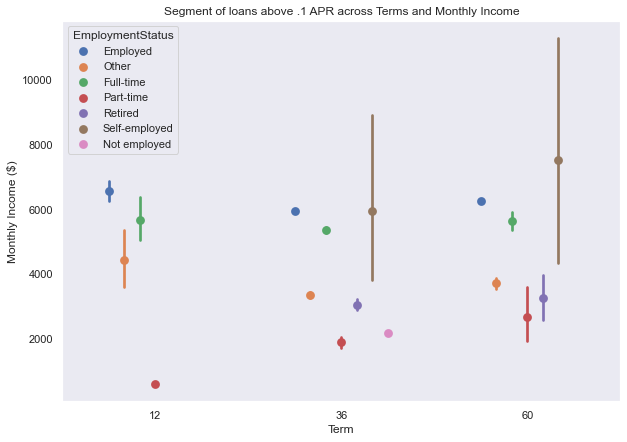

In [943]:
# create second segment of loans that have above .1 APR
df_loan_mid = (df_loan['BorrowerAPR'] >= .1)
df_loan_rng = df_loan.loc[df_loan_mid]

fig, ax = plt.subplots(ncols = 1, figsize = [10,7])

sb.pointplot(data = df_loan_rng, x = 'Term', y = 'StatedMonthlyIncome',
             hue = 'EmploymentStatus', dodge = 0.5, linestyles = '')
ax.set_title('Segment of loans above .1 APR across Terms and Monthly Income')
ax.set_xlabel('Term')
ax.set_ylabel('Monthly Income ($)')

- employment statuses more associated with an APR above .1 lean more towards self employed, retired, not employed, part time, and other. 

In [944]:
# Need to make more of a visual distribution of how employment status is distributed amongst other variables by 
# using a scatterplot variation

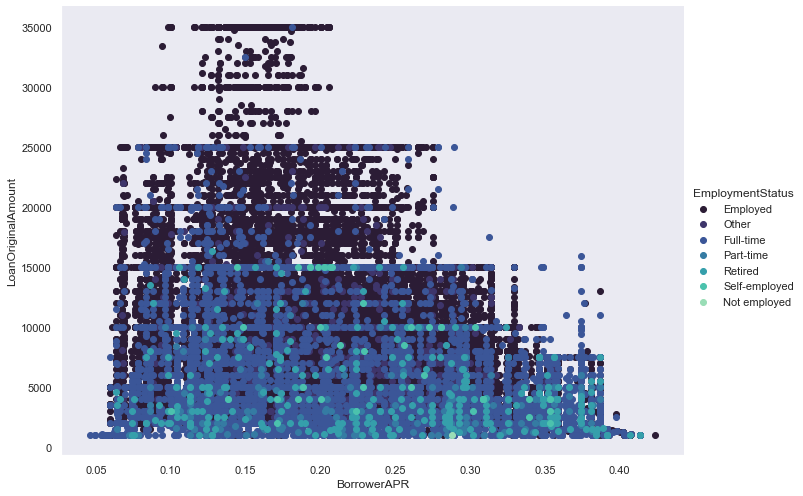

In [945]:
g = sb.FacetGrid(data = df_loan, hue = 'EmploymentStatus',  height = 7, aspect = 1.4, palette = "mako")
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount')
g.add_legend();

- Full-time, part-time, other, and employed individuals have a noticeabley higher chance of a low APR and high loan amount compared to the other categories which appear to have somewhat of an even distribution of APR while staying in a lower loan amount range.

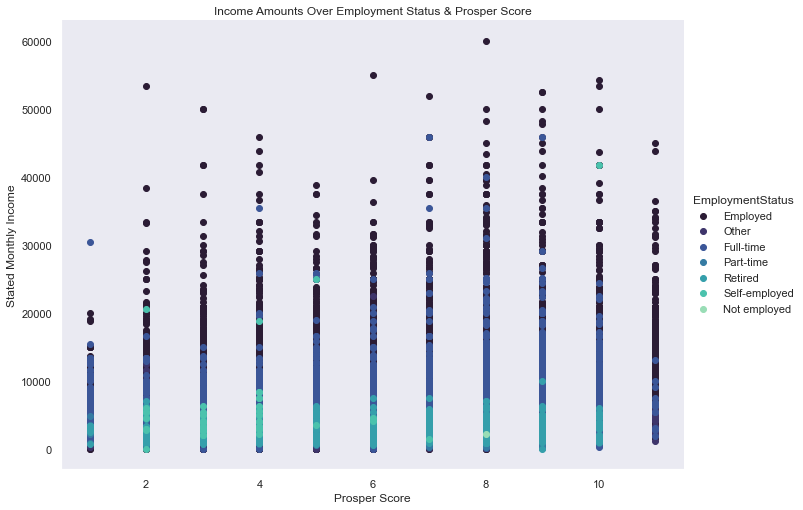

In [946]:
#using segment to get a closer look into income distribution across dataset without as many outliers
df_loan_rng = (df_loan['StatedMonthlyIncome'] <= 60000)
df_loan_seg = df_loan.loc[df_loan_rng]
g = sb.FacetGrid(data = df_loan_seg, hue = 'EmploymentStatus',  height = 7, aspect = 1.4, palette = "mako")
g.map(plt.scatter, 'ProsperScore', 'StatedMonthlyIncome')
plt.xlabel('Prosper Score')
plt.ylabel('Stated Monthly Income')
plt.title('Income Amounts Over Employment Status & Prosper Score')
g.add_legend();

In [947]:
# one variable I haven't addressed much yet is the debt to income ratio - would be valuable to see
# how it is distributed across the prosper scores and employment statuses

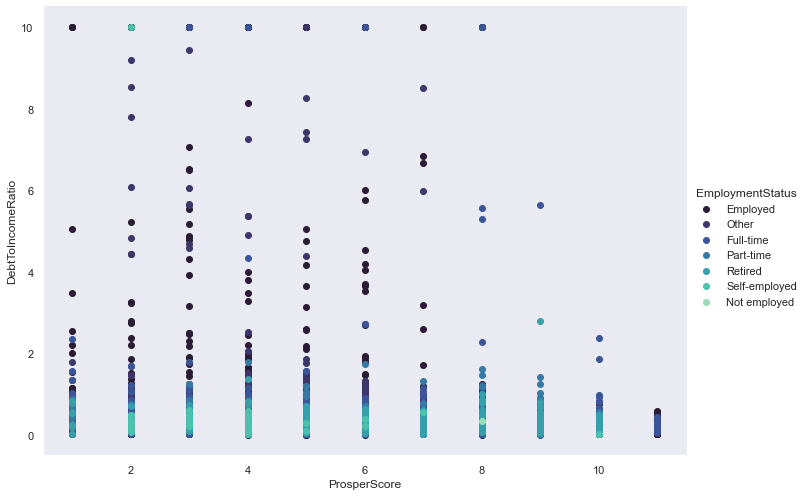

In [948]:
g = sb.FacetGrid(data = df_loan, hue = 'EmploymentStatus',  height = 7, aspect = 1.4, palette = "mako")
g.map(plt.scatter, 'ProsperScore', 'DebtToIncomeRatio')
g.add_legend();


- It appears that Debt To Income Ratio is more acceptable in applicants who are employed, as there are no self-employed applicants above prosper score 2 with a debt to income ratio of higher than 2 - in comparison to employed individuals with a debt to income ratio as high as 10 that still maintain a prosper score of 8. So debt to income may not be a reliable indicator of a higher prosper score.

In [949]:
# aside from debt to income - current delinquencies would be helpful to visualize across 
# prosper score and employment status

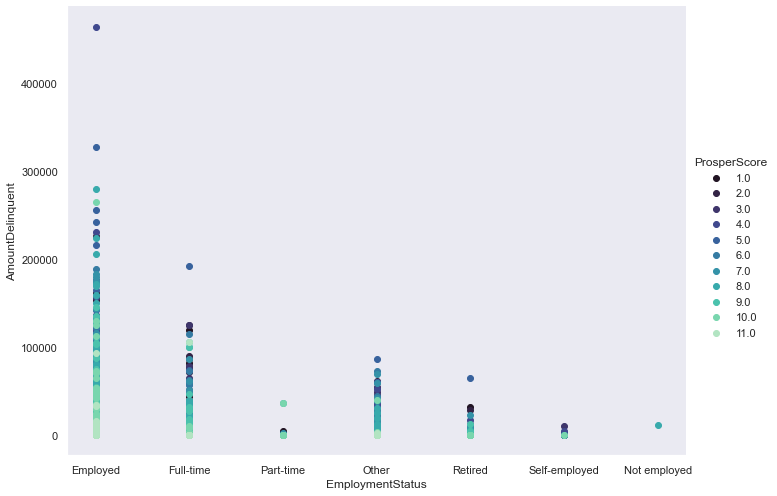

In [950]:
g = sb.FacetGrid(data = df_loan, hue = 'ProsperScore',  height = 7, aspect = 1.4, palette = "mako")
g.map(plt.scatter, 'EmploymentStatus', 'AmountDelinquent')
g.add_legend();


- Employed, Full-time, and Other individuals are much more likely to be able to have a higher delinquency amount while being able to still maintain a high prosper score than part time, self employed, and not employed individuals. 

## 4. Conclusions


- Ultimately, the findings indicate that the impact of an approved applicants Prosper Score has more to do with the loan amounts and terms that become available to them when looking at the average loan amount spread across terms and prosper score heatmap. 



- When looking at the APR spread across employment status and Prosper Score - it is clear that the APR is heavily correlated with prosper score mainly when considering employment status. This is not as clear when looking at employment duration - however, when looking at the average employment duration heatmap, there is a distinct difference in the average duration of employment status amongst the different categories. For example, the average duration of 'Not employed' individuals has a range between around .16 to around .46 whereas self-employed has a range of around .99 to around .116. Although, The employment duration range varies across increasing Prosper Scores so the duration may be outweighed by other factors when determining an applicant's Prosper Score - but each employment status appears to have a required duration range in order to be eligible for a loan in the first place.



- It appears that the segment of users that are self-empoyed, retired, or part-time are much more likely to end up with an APR of above .1 than the full-time and employed categories although they still have a high chance of ending up with a higher APR as well. This is clear when observing the different segments created amongst the line plots.


- When looking at the univariate histograms of current delinquencies and amount delinquent - it is clear that the actual amount of debt owed has a more consistent distribution where the amount of delinquencies themselves does not appear to have much impact on the amount of approved applicants. This is surprising, but if one were to look at the amount of delinquencies alone it would be misleading as it looks very bad - but when looking at the whole amount of debt of the dataset it shows that even though there are a lot of individuals with many delinquencies, the majority of the dataset has a much smaller amount of debt owed. This is shown clearly in the right-skewed distribution of the amount delinquent histogram. 